In [1]:
from matteo_eval import user_inputs, extractIngredients, ground_truth
from white_list import white_list
from NER import extract_ingredients_NER
from preprocessing import *
from get_recipe_levenstein import levenstein_dist
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import json

In [2]:
with open('user_inputs.json', 'r') as file:
    user_inputs = json.load(file)

with open('user_inputs_ingredients.json', 'r') as file:
    ground_truth = json.load(file)

df = load_data("filtered_recipes.csv")
df = filter_tags(df,["beverages"])
df = df.iloc[len(user_inputs):]
df.reset_index(drop=True, inplace=True)

#user_inputs = user_inputs[:3]
#ground_truth = ground_truth[:3]

In [3]:
white_list_results = white_list(df, user_inputs)

In [4]:
ner_results = extract_ingredients_NER(user_inputs)

In [5]:
llm_results = extractIngredients(user_inputs)

100%|██████████| 50/50 [1:05:48<00:00, 78.98s/it] 


In [20]:
""" import pickle
with open("llm_ingr_results.pkl", "wb") as f:
    pickle.dump(llm_results, f) """

In [10]:
llm_results_split = [list(map(lambda x: x.lower().strip(), llm_results[i].split(','))) for i in range(len(llm_results))]

[['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt'], ['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt', 'pepper', 'cheese'], ['here are the ingredients:\n\nsugar', 'unsalted butter', 'bananas', 'eggs', 'fresh lemon juice', 'orange rind', 'cake flour', 'baking soda', 'salt'], ['vanilla wafers', 'butter', 'powdered sugar', 'eggs', 'whipping cream', 'strawberry', 'walnuts'], ['great northern beans', 'chicken bouillon cubes', 'dark brown sugar', 'molasses', 'cornstarch', 'onion', 'garlic powder', 'mustard powder', 'chili powder', 'salt', 'black pepper', 'bacon', 'water'], ['lean pork chops', 'flour', 'salt', 'dry mustard', 'garlic powder', 'oil', 'chicken rice soup'], ['egg roll wraps', 'whole green chilies', 'cheese', 'cornstarch', 'oil'], ['butterscotch chips', 'chinese noodles', 'salted peanuts'], ['water', 'salt', 'potatoes', 'spinach leaves', 'unsalted butter', 'coarse salt', 'black pepper', 'nutmeg'], ['here are the ingredient

In [12]:
def delete_before_last_newline(s):
    # CHATGPT
    # Find the position of the last newline character
    last_newline_pos = s.rfind('\n')
    
    # If a newline is found, return the substring after it
    if last_newline_pos != -1:
        return s[last_newline_pos + 1:]
    else:
        # If no newline is found, return the original string
        return s

In [14]:
llm_results_clean = []
for s in llm_results_split:
    s_clean = [delete_before_last_newline(ss) for ss in s]
    llm_results_clean.append(s_clean)


In [15]:
ingredients_lists = [white_list_results, ner_results, llm_results_clean]
methods = ["white_list", "ner", "llm"]
levenstein_results = {"white_list":[], "ner":[], "llm":[]}

for i,ingredients_list in enumerate(ingredients_lists):
    for j,ingredients in enumerate(ingredients_list):
        dist = levenstein_dist(sorted(ingredients),sorted(ground_truth[j]),0)
        levenstein_results[methods[i]].append(dist)

In [16]:

# CHATGPT GENERATED FUNCTION
def generate_violin_plot(data_dict):
    # Convert dictionary to a format suitable for seaborn
    data = []
    for method, measurements in data_dict.items():
        for measurement in measurements:
            data.append({'Method': method, 'Measurement': measurement})

    # Create a DataFrame from the data
    df = pd.DataFrame(data)

    # Set larger font sizes
    sns.set_context("notebook", font_scale=1.5)

    # Create the violin plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Method', y='Measurement', data=df, inner='quartile', cut=0)
    plt.title('Ingredients extraction method comparison')
    plt.xlabel('Method')
    plt.ylabel('Levenstein distance')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()



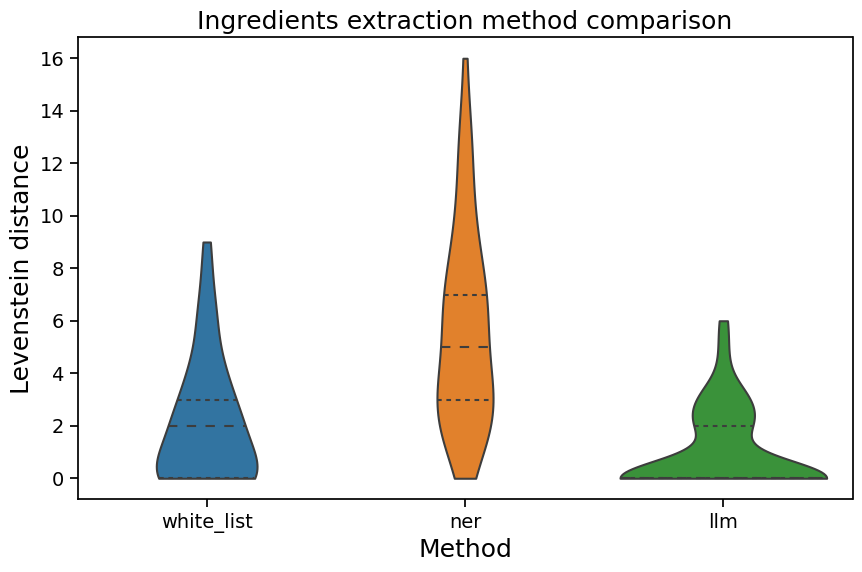

In [17]:
generate_violin_plot(levenstein_results)
